In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

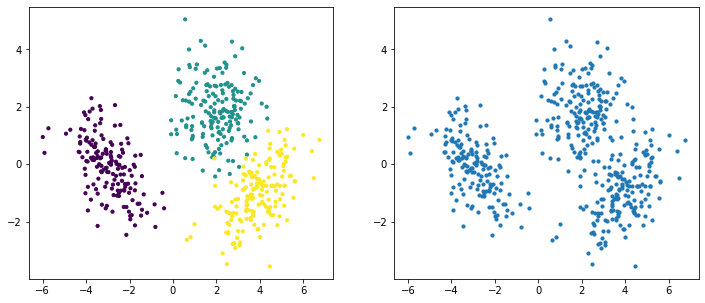

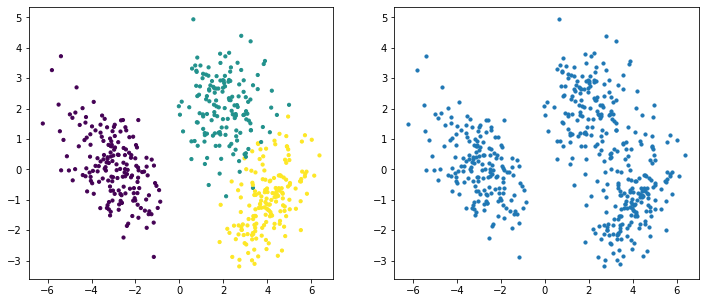

In [6]:
means = np.array([[-3, 0],
                  [2, 2],
                  [4, -1]])
covs = np.array([[[1, -0.5],
                  [-0.5, 1]],
                 [[1, 0],
                  [0 ,1]],
                 [[1, 0.5],
                  [0.5, 1]]])
N = 500
idx = np.random.randint(0, 3, N)
data = np.zeros((N, 2))
for i in range(N):
    data[i] = np.random.multivariate_normal(means[idx[i]], covs[idx[i]])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(data[:,0], data[:,1], c=idx, s=10)
ax2.scatter(data[:,0], data[:,1], s=10)
plt.show()

In [10]:
def plot_gmm(mus, sigmas):
    fig, ax = plt.subplots()
    ax.scatter(data[:,0], data[:,1], s=10)
    for mu, sigma in zip(mus, sigmas):
        lam, u = np.linalg.eig(sigma)
        theta = np.arctan(u[0, 0] / (u[1, 0]+1e-10)) / (2*np.pi) * 360
        for i in range(1, 3):
            ellipse = Ellipse((mu[0], mu[1]), width=2*lam[0]**(1/2)*i, height=2*lam[1]**(1/2)*i,
                              angle=theta, fill=None)
            ax.add_patch(ellipse)
    plt.show()

def e_step(mus, sigmas, pis):
    for k, (mu, sigma, pi) in enumerate(zip(mus, sigmas, pis)):
        respons[k, :] = pi * multivariate_normal(mu, sigma).pdf(data)
    return respons / respons.sum(0, keepdims=True), -np.log(respons.sum(0)).sum()

def m_step(respons):
    N_k = respons.sum(1, keepdims=True)
    for k in range(len(respons)):
        mus[k, :] = respons[k].reshape(1, -1) @ data / N_k[k]
        sigmas[k, ...] = (respons[k].reshape(-1, 1) * (data - mus[k, :])).T @ (data - mus[k, :]) / N_k[k]
        pis[k] = N_k[k] / N
    return mus, sigmas, pis



Iteration 0, NLL = 7387.068967193477


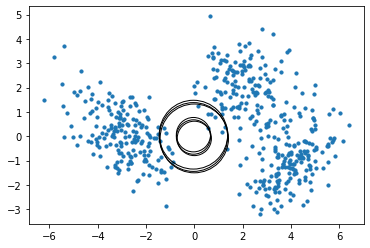

[0.33333333 0.33333333 0.33333333]
Iteration 5, NLL = 2218.188445094929


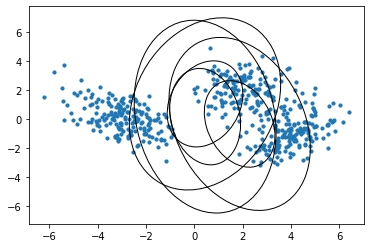

[0.33942671 0.30826865 0.35230463]
Iteration 10, NLL = 2157.8926028083897


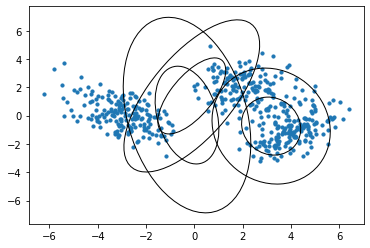

[0.33190669 0.27689893 0.39119439]
Iteration 15, NLL = 2043.6473286778466


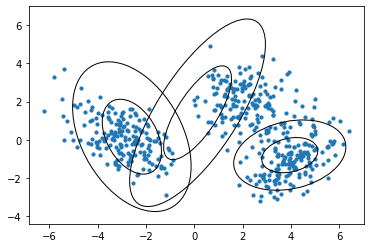

[0.36966201 0.22589484 0.40444315]
Iteration 20, NLL = 1934.892472908039


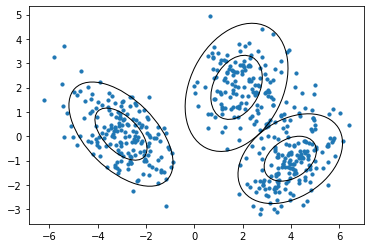

[0.35864624 0.33761622 0.30373754]
Iteration 25, NLL = 1913.5437998604684


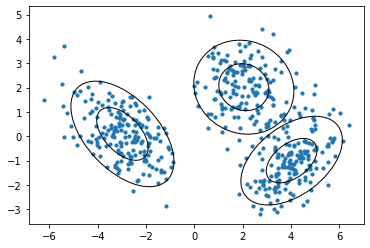

[0.33903195 0.35600073 0.30496732]
Iteration 30, NLL = 1912.8393479168437


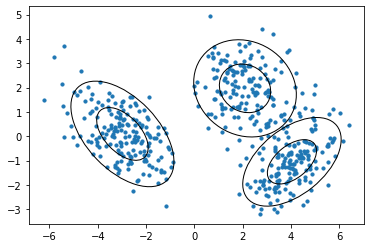

[0.32866097 0.35599711 0.31534192]
Iteration 35, NLL = 1912.5725992156513


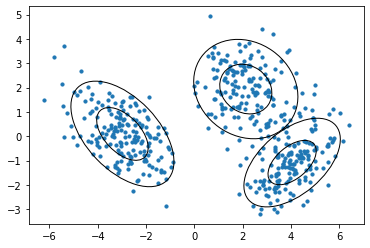

[0.32226009 0.35599389 0.32174602]
Iteration 40, NLL = 1912.4718409011064


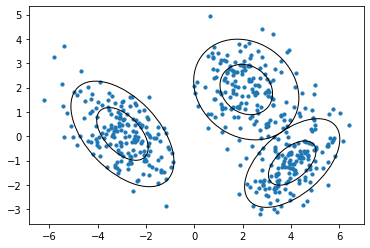

[0.31828786 0.3559918  0.32572034]


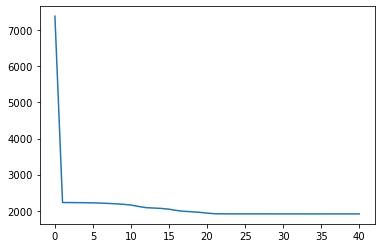

In [15]:
iters = 40
n = 3
mus = np.random.uniform(-0.1, 0.1, (n, 2))
sigmas = np.stack((np.eye(2)/2, np.eye(2)/2, np.eye(2)/2))
pis = np.ones(n)/n
respons = np.zeros((n, N))
nlls = np.zeros(iters+1)
for i in range(iters+1):
    respons, nll = e_step(mus, sigmas, pis)
    nlls[i] = nll
    if i % 5 == 0:
        print(f"Iteration {i}, NLL = {nll}")
        plot_gmm(mus, sigmas)
        print(pis)
    mus, sigmas, pis = m_step(respons)
fig, ax = plt.subplots()
ax.plot(nlls)
plt.show()